In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()

In [3]:
data = pd.read_csv("20191226-reviews.csv")
print(data.head())

         asin           name  rating               date  verified   
0  B0000SX2UC          Janet       3   October 11, 2005     False  \
1  B0000SX2UC     Luke Wyatt       1    January 7, 2004     False   
2  B0000SX2UC         Brooke       5  December 30, 2003     False   
3  B0000SX2UC  amy m. teague       3     March 18, 2004     False   
4  B0000SX2UC  tristazbimmer       4    August 28, 2005     False   

                                          title   
0                   Def not best, but not worst  \
1                   Text Messaging Doesn't Work   
2                               Love This Phone   
3                       Love the Phone, BUT...!   
4  Great phone service and options, lousy case!   

                                                body  helpfulVotes  
0  I had the Samsung A600 for awhile which is abs...           1.0  
1  Due to a software issue between Nokia and Spri...          17.0  
2  This is a great, reliable phone. I also purcha...           5.0  
3 

In [4]:
print(data.describe())

             rating  helpfulVotes
count  67986.000000  27215.000000
mean       3.807916      8.229690
std        1.582906     31.954877
min        1.000000      1.000000
25%        3.000000      1.000000
50%        5.000000      2.000000
75%        5.000000      5.000000
max        5.000000    990.000000


In [5]:
data = data.dropna()
data

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0
...,...,...,...,...,...,...,...,...
67978,B081H6STQQ,Rock Edge,5,"July 16, 2019",False,Candy bar phone is back!,Update 8/14/19 5 stars now! I've been using th...,12.0
67979,B081H6STQQ,Cindy Cowles,3,"July 17, 2019",False,Updated review,Update: If you like sending and receiving pict...,2.0
67980,B081H6STQQ,Los Kositos,5,"October 7, 2019",False,From iPhone to Android and loving it,I love my new phone. I've been dying to do a r...,1.0
67981,B081H6STQQ,jande,5,"August 16, 2019",False,"Awesome Phone, but finger scanner is a big mis...",I love the camera on this phone. The screen is...,1.0


In [6]:
ratings = data["rating"].value_counts()
numbers = ratings.index
quantity = ratings.values

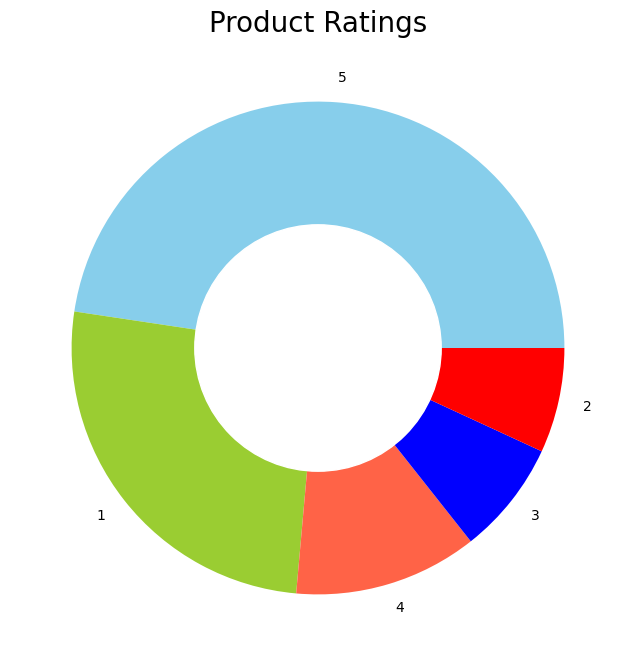

In [7]:
custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(10, 8))
plt.pie(quantity, labels=numbers, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Product Ratings", fontsize=20)
plt.show()

In [8]:
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["body"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["body"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["body"]]
print(data.head())

         asin           name  rating               date  verified   
0  B0000SX2UC          Janet       3   October 11, 2005     False  \
1  B0000SX2UC     Luke Wyatt       1    January 7, 2004     False   
2  B0000SX2UC         Brooke       5  December 30, 2003     False   
3  B0000SX2UC  amy m. teague       3     March 18, 2004     False   
4  B0000SX2UC  tristazbimmer       4    August 28, 2005     False   

                                          title   
0                   Def not best, but not worst  \
1                   Text Messaging Doesn't Work   
2                               Love This Phone   
3                       Love the Phone, BUT...!   
4  Great phone service and options, lousy case!   

                                                body  helpfulVotes  Positive   
0  I had the Samsung A600 for awhile which is abs...           1.0     0.105  \
1  Due to a software issue between Nokia and Spri...          17.0     0.104   
2  This is a great, reliable phone. I 

In [9]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


In [10]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  5021.1730000000025
Negative:  1756.803999999994
Neutral:  20415.93600000008
